# Imports

In [1]:
# Links:
# https://www.askpython.com/python/examples/stock-price-prediction-python
# https://www.codespeedy.com/predicting-stock-price-using-lstm-python-ml/

In [2]:
%%capture
# %%capture: Show now output for this cell
# Imports
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import math

In [3]:
import access_api as api
from dataset import Dataset
from model import LSTM_model

2021-10-28 20:22:28.467644: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-28 20:22:28.467673: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [4]:
# Define tickers for our testing
tickers = ["ABNB", "BTC_USD", "GOOG", "AAPL"]

# Define a date range
start_date = datetime(2005, 1, 29)
end_date = datetime.today()
pred_base_range = 60

In [5]:
# abnb = api.get_stock_data("ABNB", start_date)
# abnb_dataset = Dataset("ABNB", start_date, end_date, abnb, False)
# x_train, y_train, x_test, y_test, scaler = abnb_dataset.scaled_train_test_split()
# x_train, y_train, x_test, y_test = abnb_dataset.train_test_split()

In [6]:
btc_usd = api.get_stock_data("BTC-USD", start_date)
btc_usd_dataset = Dataset("BTC-USD", start_date, end_date, btc_usd, True)
# x_train, y_train, x_test, y_test, scaler = btc_usd_dataset.scaled_train_test_split()
x_train, y_train, x_test, y_test = btc_usd_dataset.train_test_split()

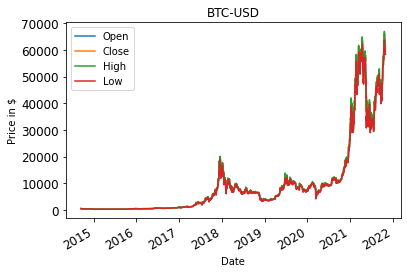

In [7]:
btc_usd_dataset.plot_price_data()

In [8]:
btc_usd_dataset.df["Adj Close"].values

array([  457.33401489,   424.44000244,   394.79598999, ...,
       60363.79296875, 58482.38671875, 61122.7890625 ])

In [9]:
btc_usd_model = LSTM_model("BTC_USD_model", "BTC-USD", start_date, end_date, pred_base_range)

2021-10-28 20:22:30.488247: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-10-28 20:22:30.488281: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-10-28 20:22:30.488306: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (martin-ThinkPad-T490): /proc/driver/nvidia/version does not exist
2021-10-28 20:22:30.488495: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
btc_usd_model.train(x_train, y_train, batch_size=1, epochs=1)

2021-10-28 20:22:30.933455: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


1757/1757 [==============================] - 49s 27ms/step - loss: 22169444.0000


In [11]:
btc_usd_model.engine.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 25)                1275      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 26        
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [12]:
btc_usd_dataset.df["Adj Close"].values

array([  457.33401489,   424.44000244,   394.79598999, ...,
       60363.79296875, 58482.38671875, 61122.7890625 ])

In [14]:
btc_usd_model.predict_future(btc_usd_dataset.df["Adj Close"].values.reshape(-1, 1))

array([[47054.984375]])

In [ ]:
# # Define tickers for our testing
# tickers = ["ABNB", "BTC_USD", "GOOG", "AAPL"]

# # Define a date range
# start_date = datetime(2005, 1, 29)
# end_date = datetime.today()
# pred_base_range = 60

# # Define a dictionary to hold our LSTM models
# lstm_models = {}

# for ticker in tickers:
#     lstm_models[ticker] = LSTM_model(ticker + "_model", ticker, start_date, end_date, pred_base_range)
    
#     # Get the data, rescale it and divide it into training and test set
#     df = data.get_adj_close_df([ticker], start_date, end_date)
#     df_values = df.values
#     scaler, scaled_dataset = data.scale_data(df_values)
#     x_train, y_train, x_test, y_test, training_data_len = data.train_test_split(scaled_dataset, days = pred_base_range)
    
#     # Train a model with the data
#     model = get_model(input_shape = x_train.shape[1])
#     model.fit(x_train, y_train, batch_size=1, epochs=1)
#     model_dict["model"] = model

NameError: name 'data' is not defined

# Date processing methods

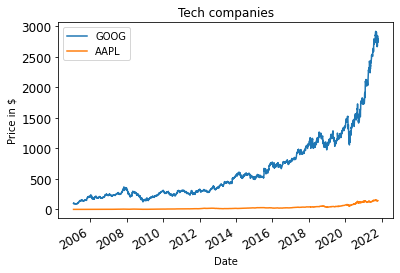

In [18]:
# Get data for multiple ticker symbols
data = get_stock_data(ticker_symbols, start_date)
formated_data = tickers_as_columns(data)

plot_data(title="Tech companies", df = formated_data)

## Train and store models

In [ ]:

# ABNB_model = create_model("ABNB", "AirBNB Model", start_date, end_date = datetime.today(), pred_base_range = pred_base_range)
# BTC_USD_model = create_model("BTC-USD", "BTC-USD Model", start_date, end_date = datetime.today(), pred_base_range = pred_base_range)
# GOOG_model = create_model("GOOG", "Google Model", start_date, end_date = datetime.today(), pred_base_range = pred_base_range)
# AAPL_model = create_model("AAPL", "Apple Model", start_date, end_date = datetime.today(), pred_base_range = pred_base_range)
# save_model_dict(ABNB_model)
# save_model_dict(BTC_USD_model)
# save_model_dict(GOOG_model)
# save_model_dict(AAPL_model)

## Predict future data based on model

In [ ]:
df_btc_usd = get_adj_close_df(["BTC-USD"], start_date, end_date = datetime.today())
df_btc_usd_values = df_btc_usd.values
predict_future(df_values, loaded_model, n_days = 20)

## Test Bitcoin prediction for 500 days

In [ ]:
BTC_USD_model_500 = create_model("BTC-USD", "BTC-USD Model 500d", start_date, end_date = datetime.today(), pred_base_range = 500)
save_model_dict(BTC_USD_model_500)

In [ ]:
predictions = predict_future(df_btc_usd_values, BTC_USD_model_500, n_days = 5)
timerange = create_timerange_from_now(include_today = False, weekends = True)
extend_df(df, predictions, timerange)

## Implement stock predictor
For your core stock predictor, implement:

A training interface that accepts a data range (start_date, end_date) and a list of ticker symbols (e.g. GOOG, AAPL), and builds a model of stock behavior. Your code should read the desired historical prices from the data source of your choice.
A query interface that accepts a list of dates and a list of ticker symbols, and outputs the predicted stock prices for each of those stocks on the given dates. Note that the query dates passed in must be after the training date range, and ticker symbols must be a subset of the ones trained on.

In [ ]:
def training_interface(start_date, end_date, ticker_symbols):
    # Read historical prices
    
    # 

In [ ]:
def query_interface(date_list, ticker_symbols)

## Preprocess the data and divide it into train and test set

### Create model

In [ ]:
# first_lstm = get_model(input_shape = x_train.shape[1])
# first_lstm.fit(x_train, y_train, batch_size=1, epochs=1)
# store_model_keras("first_lstm", first_lstm)

### Load model from disk

In [ ]:
# google_model = load_model("Google Model")

In [ ]:
# model_dict = {}
# model_dict["name"] = "Google Model"
# model_dict["model"] = google_model
# model_dict["start_date"] = start_date
# model_dict["end_date"] = end_date
# model_dict["ticker_symbols"] = ["GOOG"]
# model_dict["pred_base_range"] =  pred_base_range

In [ ]:
# test_dates = []
# test_dates.append(datetime(year = 2021, month = 9, day = 15))
# test_dates.append(datetime(year = 2021, month = 9, day = 17))
# test_dates.append(datetime(year = 2020, month = 9, day = 17))
# test_dates.append(datetime(year = 2021, month = 10, day = 17))

In [ ]:
# # Making predictions on the testing data
# prediction = make_predictions(first_lstm, x_test)
# predictions = rescale_data(prediction, scaler)

In [ ]:
# prediction.shape

In [ ]:
# plot_approximation(filtered_data=filtered_data, training_data_len= training_data_len, predictions=predictions)

In [ ]:
# goog_price = predict_future(dataset, google_model)

In [ ]:
# dt1 = datetime(year = 2021, month = 9, day=20)
# dt2 = datetime(year = 2021, month = 9, day=24)
# dt_range  = pd.date_range(start = dt1, end = dt2)

In [ ]:
# google_prediction_df = pd.DataFrame(goog_price, index = dt_range, columns = ["Predicted GOOG price"])

In [ ]:
# google_prediction_df